In [25]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os
import json
s = json.load(open(os.getenv('PUI2015')+'/plotstyle.json'))
plt.rcParams.update(s)
%matplotlib inline

In [26]:
# have a quick look at the data
path = '/Users/eliseowang/Documents/AppliedDataScience/project/sh_test.csv'
data = pd.read_csv(path)
data.head()

,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description
0,Travel & Transport,Hotel,上海天禧嘉福酒店 Skyfortune Boutique Hotel,121.390842,31.183345,217,3,136,2011.09.21,0_00_00_00_10,4e79a8e88877bac8d1cbbfbd,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,23,NaN
1,NaN,Szechuan Restaurant,四川香天下,121.392031,31.183549,9,0,3,2015.08.01,0_00_00_00_10,55bcad8a498e6bfc6d59ee71,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,1,NaN
2,Outdoors & Recreation,Golf Course,Hongqiao Golf Driving range,121.386053,31.187153,169,3,82,2012.04.02,0_00_00_00_10,4f79acbfe4b0795c3a0102d6,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,12,NaN
3,Shop & Service,Electronics Store,蘇寧電器吳中路,121.389871,31.182312,10,0,6,2013.01.06,0_00_00_00_10,50e91cfae4b09c384603f0fa,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,2,NaN
4,Food,Japanese Restaurant,龙之介炉端烧,121.387928,31.182557,120,1,51,2010.08.20,0_00_00_00_10,4c6e686c65eda093bd4251d0,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,8,NaN


We are assuming the users of 4square are homogeneous group of people with similar behaviors. Foursquare users are considered sensors around the world, reflecting the data.

## See what the unique categories are (in alphabetical order)

In [27]:
catValues = sorted(data['genCategory'].unique())
catValues

[nan,
 'Arts & Entertainment',
 'College & University',
 'Event',
 'Food',
 'Nightlife Spot',
 'Outdoors & Recreation',
 'Professional & Other Places',
 'Residence',
 'Shop & Service',
 'Travel & Transport']

## Create a categorical value for each category string (not necessary but just in case you need it in your column)

In [217]:
# create a dictionary of string-int pair.
unique = {catValues[i]:i for i in range(len(catValues))}
# set the numerical value of NaNs to np.nan
unique[np.nan] = np.nan
unique

{nan: nan,
 'Arts & Entertainment': 1,
 'College & University': 2,
 'Event': 3,
 'Food': 4,
 'Nightlife Spot': 5,
 'Outdoors & Recreation': 6,
 'Professional & Other Places': 7,
 'Residence': 8,
 'Shop & Service': 9,
 'Travel & Transport': 10}

In [220]:
# transform the dic into a dataframe
cateValues = pd.DataFrame(unique, 
                      index=[1]).T.reset_index().rename(columns={'index':'genCategory',
                                                                 1:'CateValue'})
cateValues

,genCategory,CateValue
0,NaN,NaN
1,Arts & Entertainment,1
2,College & University,2
3,Event,3
4,Food,4
5,Nightlife Spot,5
6,Outdoors & Recreation,6
7,Professional & Other Places,7
8,Residence,8
9,Shop & Service,9


In [224]:
# give pair the genCategory of each row with the corresponding categorical value
data2 = data.merge(cateValues, how='left', on='genCategory')
data2.head()

,genCategory,category,name,lon,lat,checkIns,tips,users,createdAt,tileID,ID,query,time,verified,price,rating,tags,photoCount,description,CateValue
0,Travel & Transport,Hotel,上海天禧嘉福酒店 Skyfortune Boutique Hotel,121.390842,31.183345,217,3,136,2011.09.21,0_00_00_00_10,4e79a8e88877bac8d1cbbfbd,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,23,NaN,10
1,NaN,Szechuan Restaurant,四川香天下,121.392031,31.183549,9,0,3,2015.08.01,0_00_00_00_10,55bcad8a498e6bfc6d59ee71,China_Shanghai,2015.11.08 22:54:55,False,-1,-1,NaN,1,NaN,NaN
2,Outdoors & Recreation,Golf Course,Hongqiao Golf Driving range,121.386053,31.187153,169,3,82,2012.04.02,0_00_00_00_10,4f79acbfe4b0795c3a0102d6,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,12,NaN,6
3,Shop & Service,Electronics Store,蘇寧電器吳中路,121.389871,31.182312,10,0,6,2013.01.06,0_00_00_00_10,50e91cfae4b09c384603f0fa,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,2,NaN,9
4,Food,Japanese Restaurant,龙之介炉端烧,121.387928,31.182557,120,1,51,2010.08.20,0_00_00_00_10,4c6e686c65eda093bd4251d0,China_Shanghai,2015.11.08 22:54:56,False,-1,-1,NaN,8,NaN,4


## Plot all the general categories on the same figure using different colors for each category.

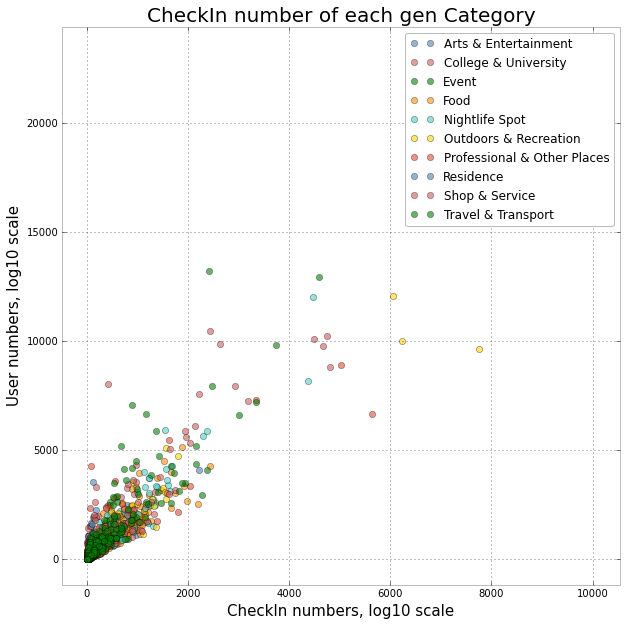

In [261]:
# group the data by general category
groups = data2.groupby('genCategory')
# create a 10 * 10 figure
fig, ax = plt.subplots(figsize=(10,10))
# add 5% padding to the autoscaling
ax.margins(0.05)
# plot all the general categories
for name, group in groups:
    ax.plot(group.users, group.checkIns, marker='o',
            linestyle='', ms=6, alpha=.6, label=name )

ax.set_ylabel('User numbers, log10 scale', fontsize=15)
ax.set_xlabel('CheckIn numbers, log10 scale', fontsize=15)
ax.set_title('CheckIn number of each gen Category', fontsize=20)
ax.legend()

## Plot at log scale

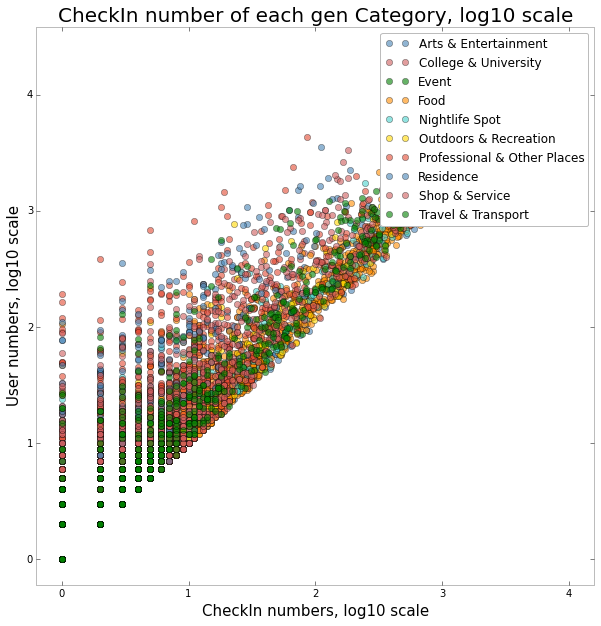

In [262]:
# group the data by general category
groups = data2.groupby('genCategory')
# create a 10 * 10 figure
fig, ax = plt.subplots(figsize=(10,10))
# add 5% padding to the autoscaling
ax.margins(0.05)
# plot all the general categories
for name, group in groups:
    ax.plot(np.log10(group.users), np.log10(group.checkIns), marker='o',
            linestyle='', ms=6, alpha=.6, label=name )

ax.set_ylabel('User numbers, log10 scale', fontsize=15)
ax.set_xlabel('CheckIn numbers, log10 scale', fontsize=15)
ax.set_title('CheckIn number of each gen Category, log10 scale', fontsize=20)
ax.grid(False)
ax.legend()
#ax.legend(numpoints=1)  

## plot each general category on a different figure

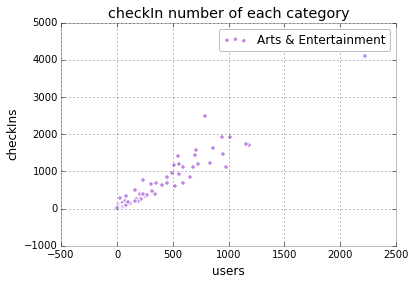

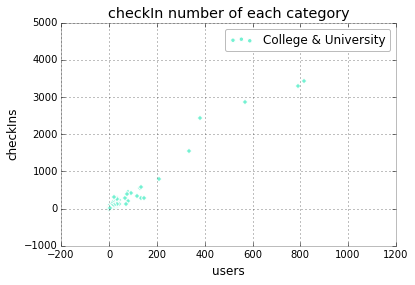

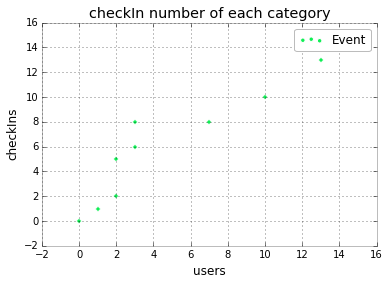

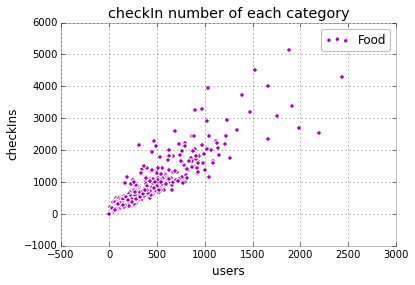

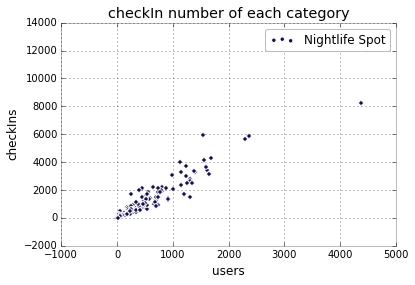

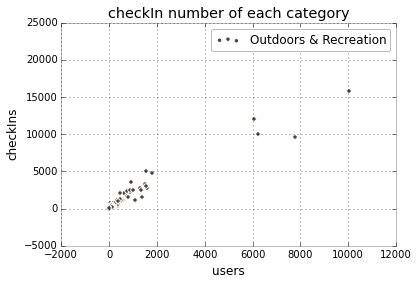

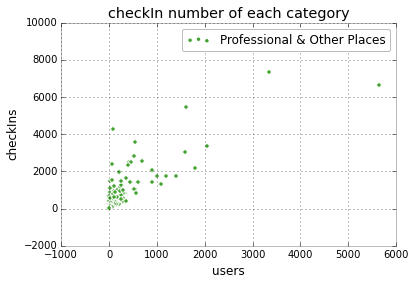

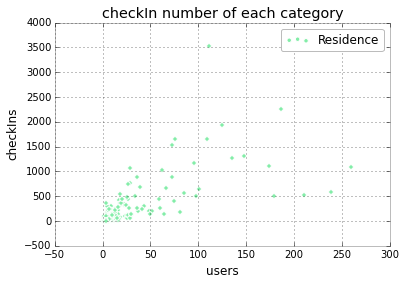

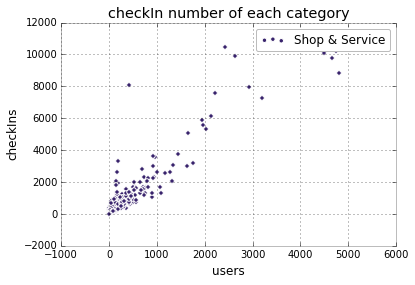

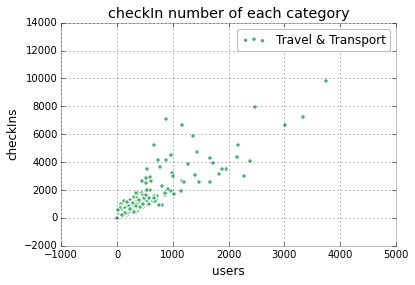

In [268]:
np.random.seed(2015)
# create a 10 * 10 figure
fig1= plt.figure(figsize=(10,10))
for name, group in groups:
    group.plot(x='users', y='checkIns', 
               kind='scatter',color=np.random.rand(3),
               label=name, title='checkIn number of each category',
               fontsize=10)

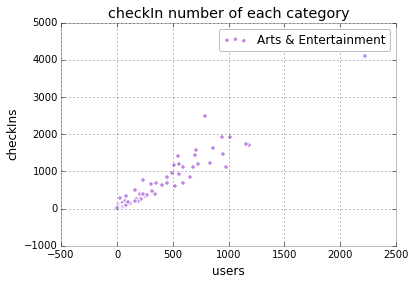

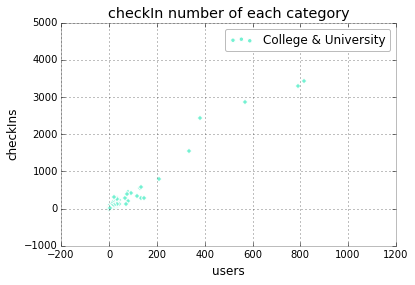

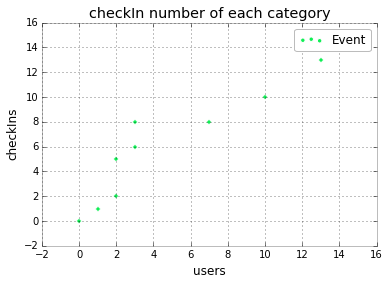

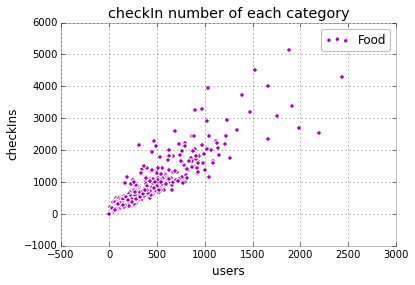

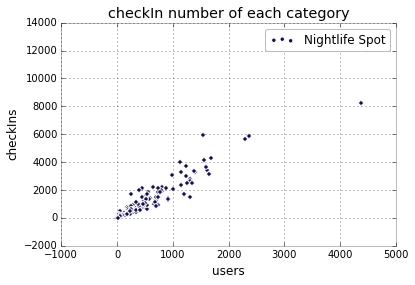

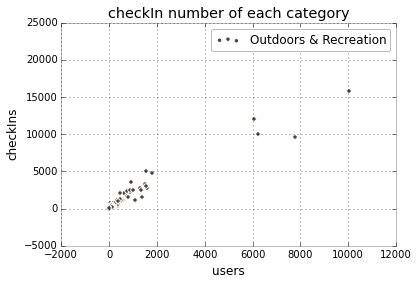

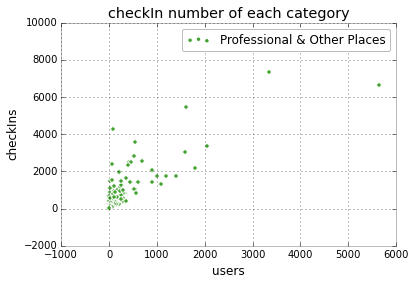

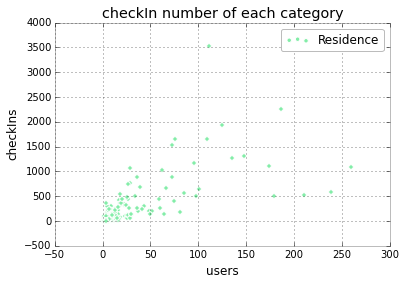

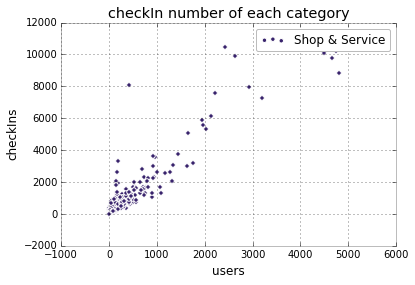

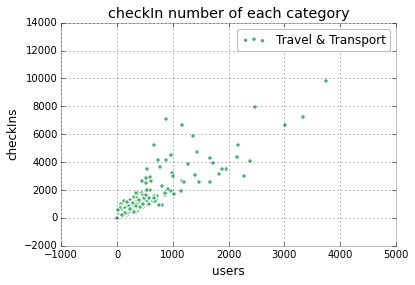

In [291]:
np.random.seed(2015)
# create a 10 * 10 figure
fig1= plt.figure(figsize=(10,10))
for name, group in groups:
    group.plot(x='users', y='checkIns',
               kind='scatter',color=np.random.rand(3),
               label=name, title='checkIn number of each category',
               fontsize=10)

In [271]:
# run a linear regression (without intercept) for the data
lm = smf.ols(formula='Y ~ X - 1', data={'Y':data2.checkIns, 'X':data2.users}).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                 5.850e+04
Date:                Thu, 12 Nov 2015   Prob (F-statistic):               0.00
Time:                        11:42:37   Log-Likelihood:                -71317.
No. Observations:               10075   AIC:                         1.426e+05
Df Residuals:                   10074   BIC:                         1.426e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X              2.1457      0.009    241.876      0.000         2.128     2.163
==============================================================================
Omnibus:                    12712.549   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25802680.982
Skew:                           5.968   Prob(JB):                         0.00
Kurtosis:                     250.635   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot the regression line for the whole dataset

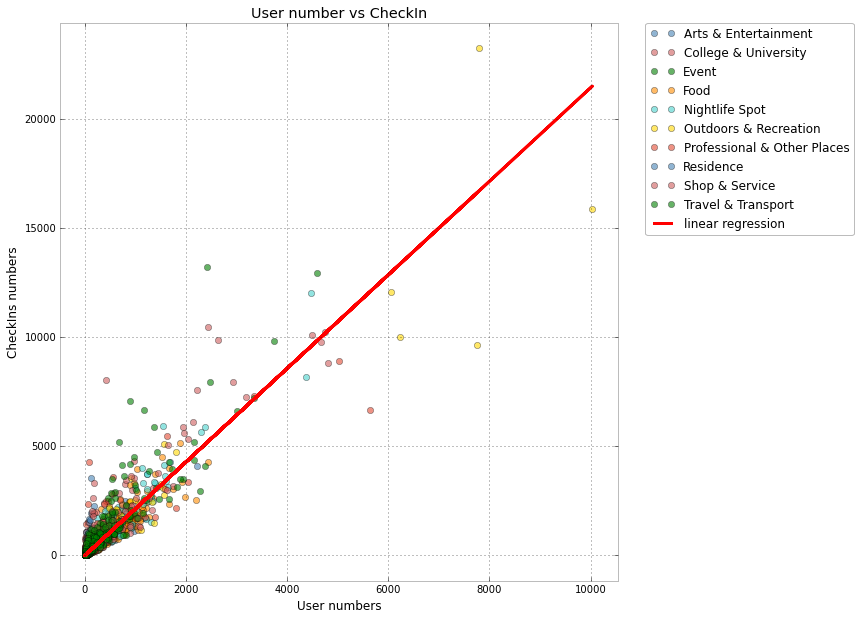

In [272]:
# group the data by general category
groups = data2.groupby('genCategory')
# create a 10 * 10 figure
fig, ax = plt.subplots(figsize=(10,10))
# add 5% padding to the autoscaling
ax.margins(0.05)
# plot all the general categories
for name, group in groups:
    ax.plot(group.users, group.checkIns, marker='o',
            linestyle='', ms=6, alpha=.6, label=name )
plt.plot(data2.users, lm.predict(), color='r', lw=3, label='linear regression')
ax.set_xlabel('User numbers')
ax.set_ylabel('CheckIns numbers')
ax.set_title('User number vs CheckIn')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.legend(numpoints=1) 

## Run a linear regression for each category and plot them separately

Arts & Entertainment
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     6504.
Date:                Thu, 12 Nov 2015   Prob (F-statistic):          2.16e-222
Time:                        11:59:05   Log-Likelihood:                -2038.1
No. Observations:                 338   AIC:                             4078.
Df Residuals:                     337   BIC:                             4082.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X              1.7739      0.02

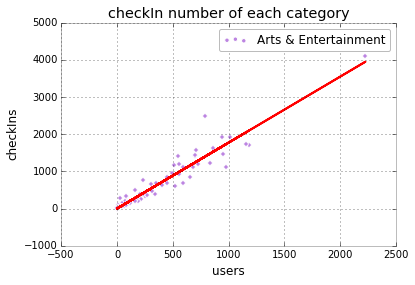

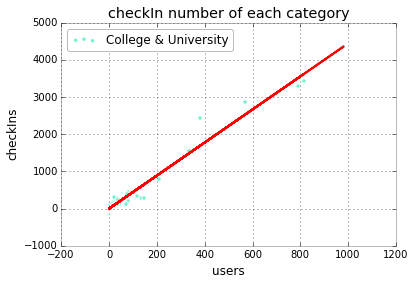

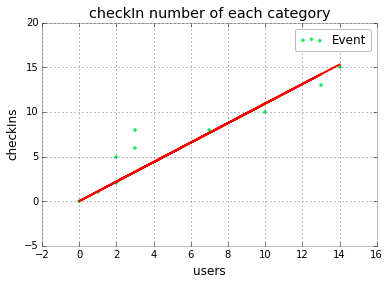

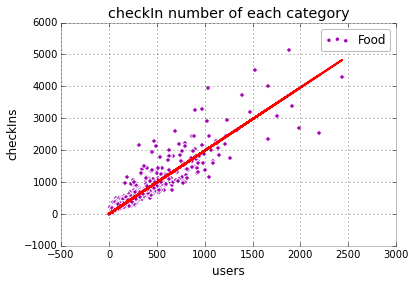

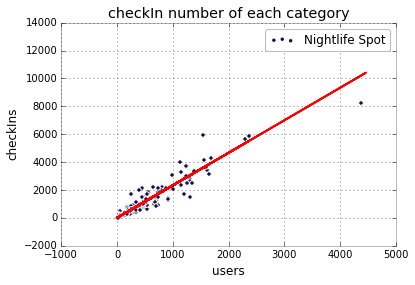

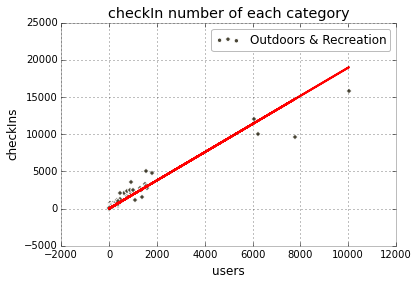

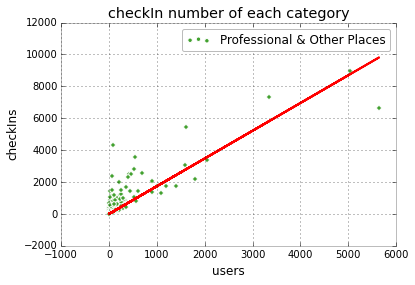

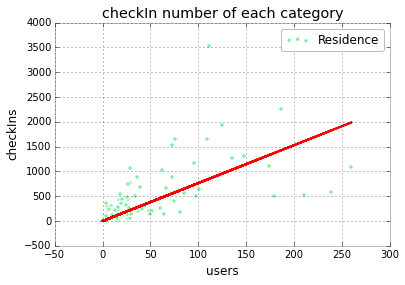

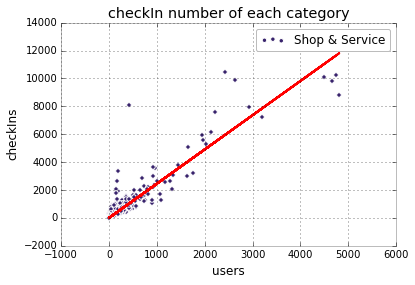

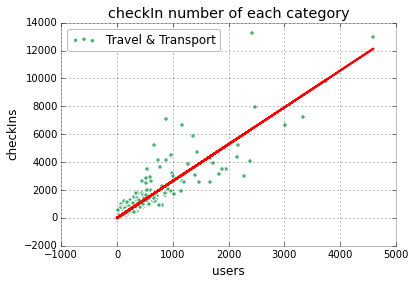

In [297]:
np.random.seed(2015)
lmE = {}
# create a 10 * 10 figure
fig1= plt.figure(figsize=(10,10))
for name, group in groups:
    lmE['%s'%name[:3]] = smf.ols(formula='Y ~ X - 1', 
                               data={'Y':group.checkIns, 'X':group.users}).fit()
    group.plot(x='users', y='checkIns', 
               kind='scatter',color=np.random.rand(3),
               label=name, title='checkIn number of each category',
               fontsize=10)
    plt.plot(group.users, lmE['%s'%name[:3]].predict(), color='r', lw=2, label='linear regression')
    print '%s' %name
    print lmE['%s'%name[:3]].summary()
    print '\n'